In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(22)
X = np.random.randn(100, 1)
y = 2 * X + np.random.randn(100, 1) * 0.5

w1 = np.random.randn(1, 1)
b1 = np.random.randn(1, 1)
w2 = np.random.randn(1, 1)
b2 = np.random.randn(1, 1)

learning_rate = 0.01
epochs = 1000

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [19]:
losses_relu = []
for _ in range(epochs):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    y_pred = np.dot(a1, w2) + b2
    loss = 0.5 * np.mean((y - y_pred) ** 2)
    losses_relu.append(loss)
    dL_dy_pred = y_pred - y
    dL_dw2 = np.dot(a1.T, dL_dy_pred)
    dL_db2 = np.sum(dL_dy_pred, axis=0, keepdims=True)
    dL_da1 = np.dot(dL_dy_pred, w2.T)
    dL_dz1 = dL_da1 * relu_derivative(z1)
    dL_dw1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    w1 -= learning_rate * dL_dw1
    b1 -= learning_rate * dL_db1
    w2 -= learning_rate * dL_dw2
    b2 -= learning_rate * dL_db2

w1 = np.random.randn(1, 1)
b1 = np.random.randn(1, 1)
w2 = np.random.randn(1, 1)
b2 = np.random.randn(1, 1)

losses_sigmoid = []
for _ in range(epochs):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    y_pred = np.dot(a1, w2) + b2
    
    loss = 0.5 * np.mean((y - y_pred) ** 2)
    losses_sigmoid.append(loss)
    
    dL_dy_pred = y_pred - y
    dL_dw2 = np.dot(a1.T, dL_dy_pred)
    dL_db2 = np.sum(dL_dy_pred, axis=0, keepdims=True)
    dL_da1 = np.dot(dL_dy_pred, w2.T)
    dL_dz1 = dL_da1 * sigmoid_derivative(z1)
    dL_dw1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    
    w1 -= learning_rate * dL_dw1
    b1 -= learning_rate * dL_db1
    w2 -= learning_rate * dL_dw2
    b2 -= learning_rate * dL_db2

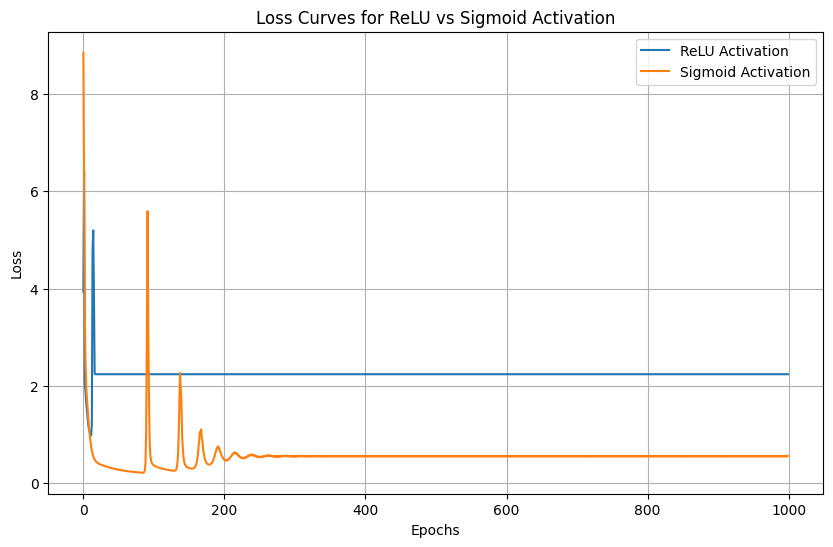

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(losses_relu, label="ReLU Activation")
plt.plot(losses_sigmoid, label="Sigmoid Activation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for ReLU vs Sigmoid Activation")
plt.legend()
plt.grid()
plt.show()